<a href="https://colab.research.google.com/github/AdiraMartin/Assignment-EDA/blob/main/HW_EDA_SPECIAL_Adira_Khansa_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 19c8os2vb1Ca0C0sgscsJZOUN7jCINb5y

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19c8os2vb1Ca0C0sgscsJZOUN7jCINb5y
To: /content/bank_churn.csv
100% 838k/838k [00:00<00:00, 93.0MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
bank = pd.read_csv('bank_churn.csv')
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,4716.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,3,4003.0,1851
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4,4277.0,2186
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,5,5409.0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,4,5281.0,0


Data Dictionary :

`CLIENTNUM` : Primary Key

`Attrition_Flag` : whether customer has churn or not. Exsiting cutomer are those who holds an account and still concuctiong transactions, attrited customer is a customer who previosly held an account but has closed their account

`Customer_Age` : the age of customer

`Gender` : M (male) or F (female)

`Dependent_count`: The number of dependents that customer has

`Education_Level` : customer level educations ('Unknown', 'Uneducated',High School', 'Graduate', 'College' 'Post-Graduate', 'Doctorate)

`Marital_Status` : customer marital status ('Married', 'Single', 'Unknown', 'Divorced')

`Income_Category` : customer categorical income (Less than $40K, $40K - $60K,$60K - $80K, $80K - $120K, $120K +, Unknown)

`Card_Category` : Blue, Gold, Silver, Platinum

`Total_Relationship_Count` : the number of products or services a customer has with the bank

`Credit_Limit`: the maximum amount of credit a customer can borrow on their account

`Total_Revolving_Bal` : total outstanding balance on a revolving credit account



In [ ]:
bank.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Credit_Limit                0
Total_Revolving_Bal         0
dtype: int64

In [ ]:
bank.duplicated().sum()

0

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 949.5+ KB


In [ ]:
bank.duplicated(subset='CLIENTNUM').sum()

0

In [ ]:
numericals = bank.select_dtypes(include = ['int64','float64']).columns.tolist()
categoricals = bank.select_dtypes(exclude = ['int64' , 'float64']).columns.tolist()

print (numericals)
print (categoricals)

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal']
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [ ]:
bank[numericals].describe()

,CLIENTNUM,Customer_Age,Dependent_count,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.812580,8631.953698,1162.814061
std,3.690378e+07,8.016814,1.298908,1.554408,9088.776650,814.987335
min,7.080821e+08,26.000000,0.000000,1.000000,1438.300000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.000000,2555.000000,359.000000
50%,7.179264e+08,46.000000,2.000000,4.000000,4549.000000,1276.000000
75%,7.731435e+08,52.000000,3.000000,5.000000,11067.500000,1784.000000
max,8.283431e+08,73.000000,5.000000,6.000000,34516.000000,2517.000000


obs:

1. CLIENTNUM can be ignored
2. Min max value are makesense
3. Without visualizations,customer_age, dependent count and total relationshiop count looks normally distributed, otherwise, credit limit and total revolving balance are positively skewed (mean > median)

In [ ]:
bank[categoricals].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
for col in categoricals:
  print(f'value counts for column {col}:')
  print(bank[col].value_counts())
  print('----'*8)
  print('\n')

value counts for column Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------


value counts for column Gender:
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------


value counts for column Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------


value counts for column Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------


value counts for column Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------


value counts for column Card_C

## Multivariate

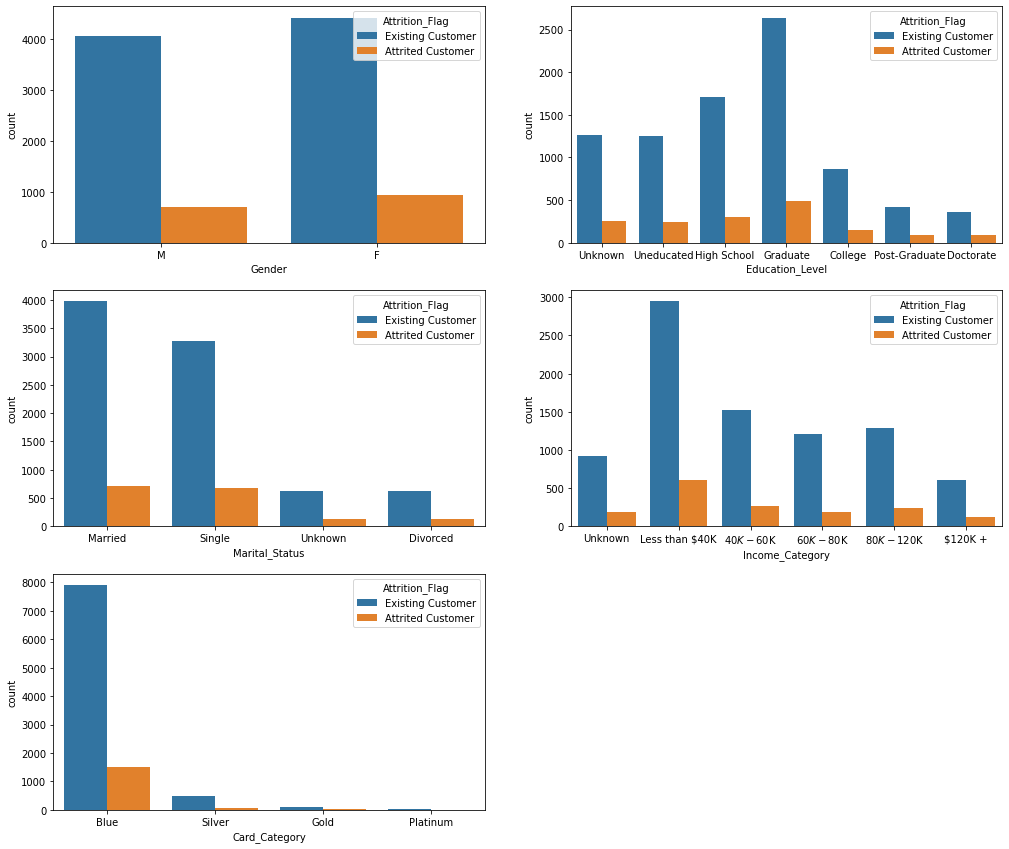

In [ ]:
selected_categoricals = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

education_order = ['Unknown', 'Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate']
income_category_order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
Card_Category_order = ['Blue', 'Silver', 'Gold', 'Platinum']

plt.figure(figsize = (17,20))

feature = selected_categoricals

for i in np.arange(1, len(feature)+1):
  if feature [i-1] == 'Education_Level' :
    plt.subplot(4, len(feature)//4+1,i)
    sns.countplot(x=bank[feature[i-1]], hue=bank['Attrition_Flag'], order = education_order)

  elif feature [i-1] == 'Income_Category' :
    plt.subplot(4, len(feature)//4+1,i)
    sns.countplot(x=bank[feature[i-1]], hue = bank['Attrition_Flag'], order = income_category_order)

  elif feature [i-1] == 'Card_Category' :
    plt.subplot(4, len(feature)//4+1,i)
    sns.countplot(x=bank[feature[i-1]], hue = bank['Attrition_Flag'], order = Card_Category_order)

  else:
    plt.subplot(4,len(feature)//4+1,i)
    sns.countplot(x=bank[feature[i-1]], hue = bank['Attrition_Flag'])


  plt.xlabel(feature[i-1])
  plt.tight_layout

obs:

* Dalam visualisasi ini sepertinya terdapa konsistensi pattern pada seluruh variabel
* Pada nasabah dengan level edukasi docotorate meskipun memiliki jumlah nasabah paling sedikit jumlah mmereka yang menutup account pada bank tersebut hampir sama dengan postgraduate. Mungkin perlu dilihat lebih mendalam
* Dapat dilihat juga sepertinya bank ini merupakan bank yang merakyat berfokus pada nasabah dengan kategori income yang rendah dengan card kategori terendah pula


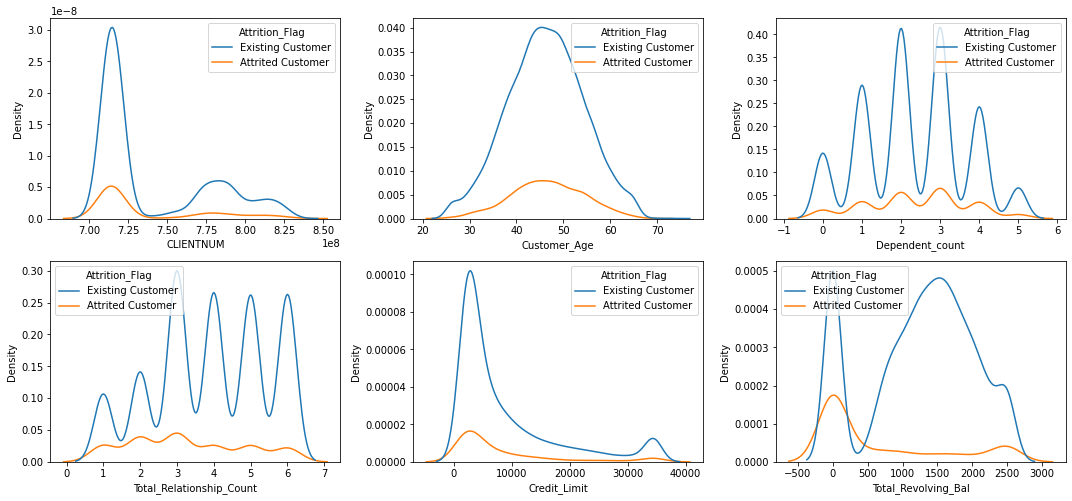

In [ ]:
plt.figure(figsize =(15,10))

for i in np.arange(1,len(numericals)+1):
  plt.subplot(3, len (numericals)// 3+1, i)
  sns.kdeplot(x=bank[numericals[i-1]], hue=bank['Attrition_Flag'])

plt.xlabel(numericals[i-1])
plt.tight_layout()


obs:
*  abaikan client num sebagai primary key
*  Mayoritas dari visualisasi diatas antara existing dan attrited customer memiliki puncak garis yang sama, sehingga analisa tidak memiliki perbedaan yang signifikan
*  Kebanyakan pengguna dari bank ini ada pada usia 40 - 50 tahun
*  Dapat dilihat juga bahwa nasabah umumnya memiliki tanggung jawab finansial bisa pasangan, anak-anak, atau anggota keluarga. Mayoritas sekitar 2 - 3 tanggungan



In [ ]:
# Encoding
# Sepertinya kolom kategorikal bisa diusahakan untuk dilihat hubungannya menggunakan heatmap correlation
bank['Education_level_encode'] = bank['Education_Level'].map({'Unknown' : 0,
                                                         'Uneducated': 1,
                                                         'High School': 2,
                                                         'Graduate': 3,
                                                         'College': 4,
                                                         'Post-Graduate': 5,
                                                         'Doctorate': 6})

bank['Income_Category_encode'] = bank['Income_Category'].map({'Unknown': 0,
                                                       'Less than $40K':1 ,
                                                       '$40K - $60K' : 2,
                                                       '$60K - $80K' : 3,
                                                       '$80K - $120K' : 4,
                                                       '$120K +': 5})

bank['Card_Category_encode'] = bank['Card_Category'].map({'Blue': 0,
                                                   'Silver':1 ,
                                                   'Gold' : 2,
                                                   'Platinum' : 3})

bank['Gender_encoode'] = bank['Gender'].map({'M': 0, 'F':1})

bank['Attrition_Flag_encode'] = bank['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer': 1})

bank['Martital_Status_encode'] = bank['Marital_Status'].map({'Married': 2, 'Single': 1, 'Unknown': 0, 'Divorced':3})
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Education_level_encode,Income_Category_encode,Card_Category_encode,Gender_encoode,Attrition_Flag_encode,Martital_Status_encode
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,12691.0,777,2,3,0,0,0,2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,8256.0,864,3,1,0,1,0,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,3418.0,0,3,4,0,0,0,2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,3313.0,2517,2,1,0,1,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,4716.0,0,1,3,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,3,4003.0,1851,3,2,0,0,0,1
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4,4277.0,2186,0,2,0,0,1,3
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,5,5409.0,0,2,1,0,1,1,2
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,4,5281.0,0,3,2,0,0,1,0


<Axes: >

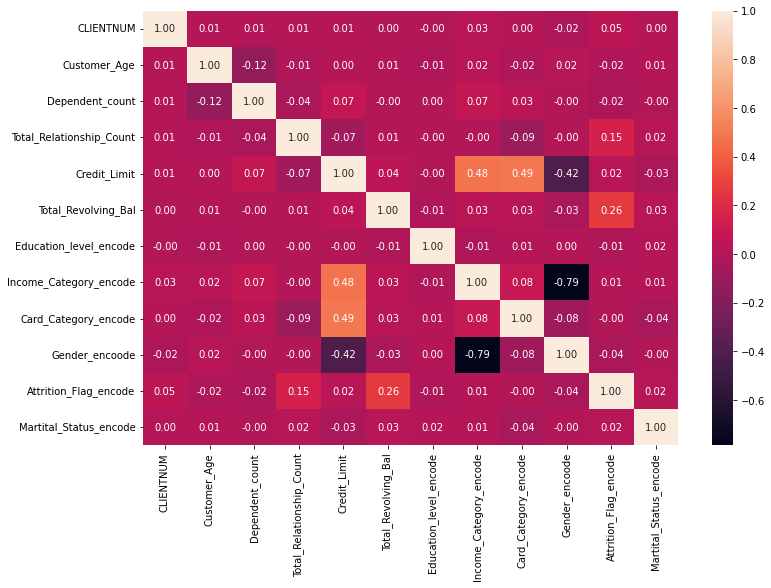

In [ ]:
plt.figure(figsize=(12,8))
correlation = bank.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Dari heatmapcorrelation diatas bisa dipastikan tidak ada hubungan yang kuat antar seluruh variabel dengan attribution flag, tapi menariknya terdapat hubungan yang lumayan kuat antara gender dan income

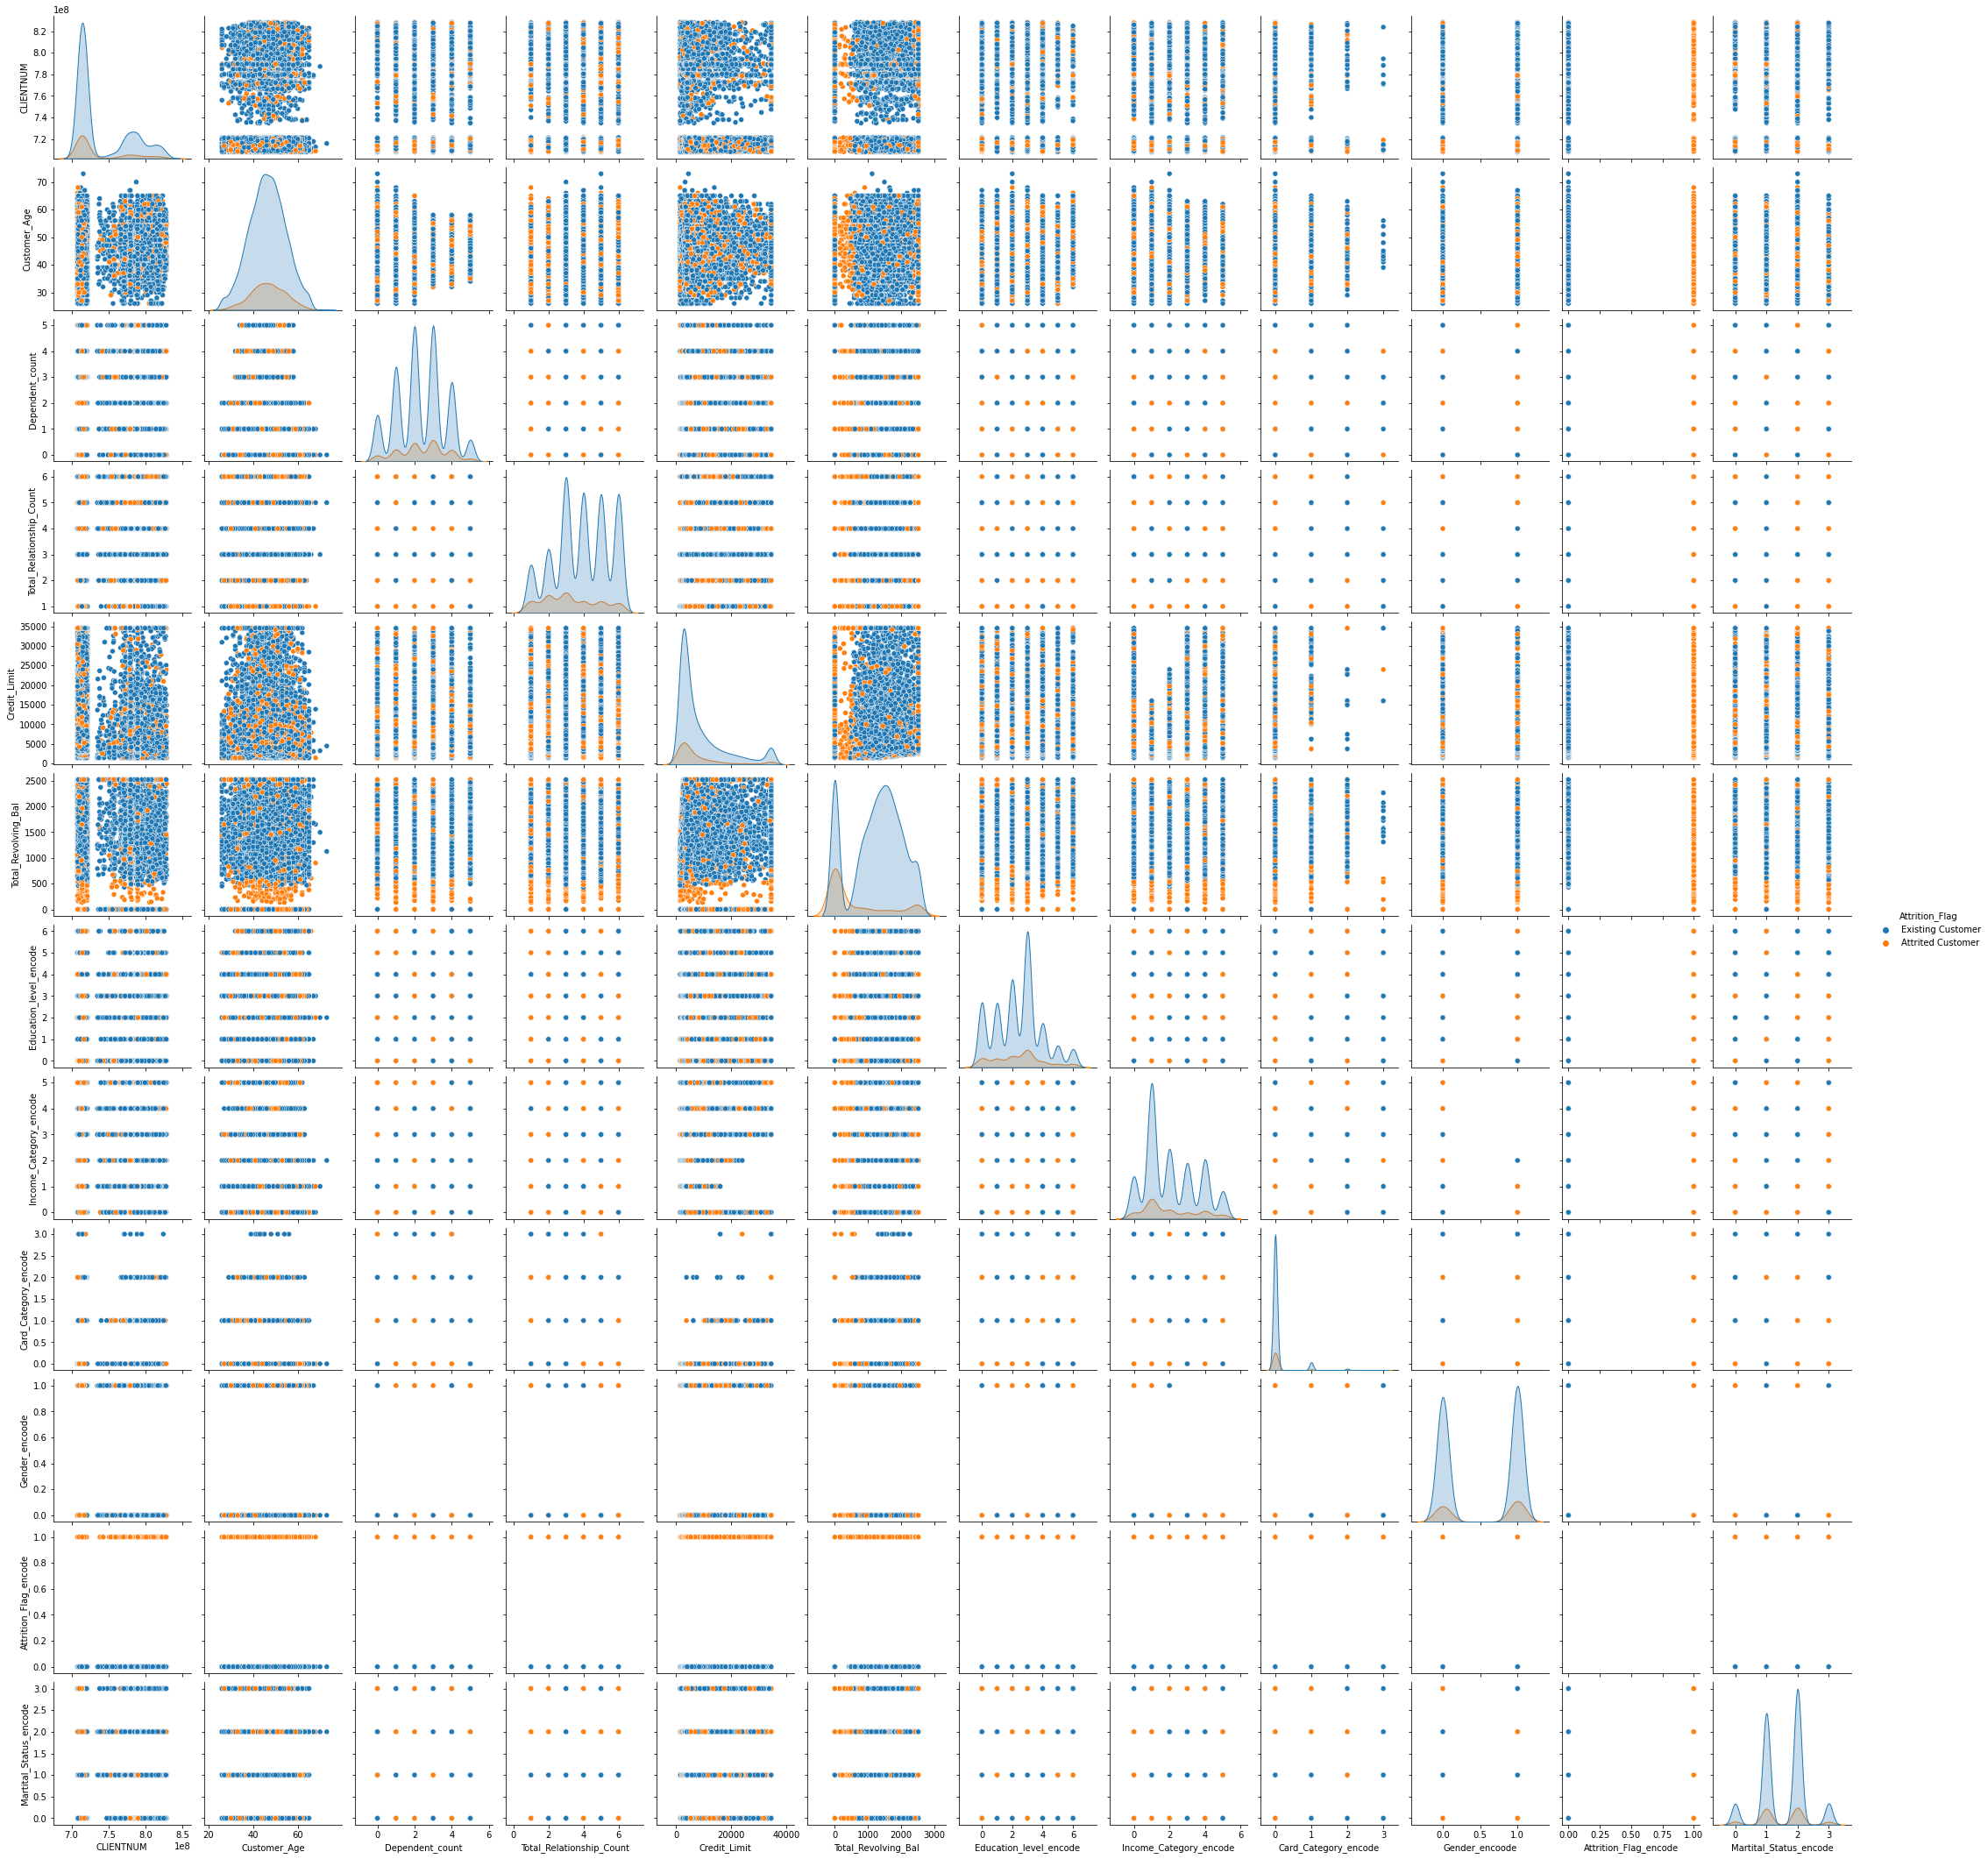

In [ ]:
sns.pairplot(bank, hue='Attrition_Flag')

Dari pairplot diatas sebaran tidak terseparasi dengan baik, tidak terdapat insight yang signifikan

## Deep Dive Analysis

In [ ]:
bank.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Education_level_encode,Income_Category_encode,Card_Category_encode,Gender_encoode,Attrition_Flag_encode,Martital_Status_encode
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,3,4003.0,1851,3,2,0,0,0,1
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4,4277.0,2186,0,2,0,0,1,3
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,5,5409.0,0,2,1,0,1,1,2
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,4,5281.0,0,3,2,0,0,1,0
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,6,10388.0,1961,3,1,1,1,1,2


In [ ]:
# Mengidentifikasi jenis-jenis nasabah yang lebih cenderung untuk melakukan attrition berdasarkan jenis kelamin, kategori penghasilan, dan tingkat pendidikan mereka (10 teratas).

customer_attrited = (bank
                  .groupby(['Gender', 'Income_Category', 'Education_Level'])
                  .agg(
                      Total_Customer =('Attrition_Flag_encode', 'count'),
                      Attrited_rate=('Attrition_Flag_encode', 'mean'))
                  .sort_values('Attrited_rate', ascending = False)
                  .reset_index()
                  )
customer_attrited.head(10)

,Gender,Income_Category,Education_Level,Total_Customer,Attrited_rate
0,M,Unknown,Doctorate,3,0.333333
1,M,Less than $40K,Post-Graduate,10,0.300000
2,F,Less than $40K,Doctorate,147,0.285714
3,M,Unknown,Uneducated,7,0.285714
4,F,Unknown,Doctorate,67,0.223881
5,M,$120K +,Doctorate,37,0.216216
6,M,$80K - $120K,Post-Graduate,81,0.209877
7,M,$60K - $80K,Post-Graduate,77,0.207792
8,F,$40K - $60K,Unknown,155,0.206452
9,M,$80K - $120K,College,175,0.205714


In [ ]:
# Mengidentifikasi pelanggan yang lebih mungkin attrited berdasarkan faktor demografi, kategori kartu, rata-rata saldo yang diputar, dan pendapatan mereka.

revolving_bal_by_attrition = (bank
                              .groupby(['Gender', 'Card_Category'])
                              .agg(
                                  Total_attrited_customer=('Attrition_Flag_encode', 'count'),
                                  average_revolving_bal  = ('Total_Revolving_Bal', 'mean'),
                                  Income=('Income_Category_encode', 'median'),
                                  median_customer_age = ('Customer_Age', 'median'),
                                  marital_status = ('Martital_Status_encode', 'median'),
                                  dependent = ('Dependent_count', 'median'))
                              .sort_values('average_revolving_bal', ascending = False)
                              .reset_index()
                              )
revolving_bal_by_attrition

,Gender,Card_Category,Total_attrited_customer,average_revolving_bal,Income,median_customer_age,marital_status,dependent
0,M,Platinum,11,1580.727273,4.0,45.0,2.0,3.0
1,M,Gold,78,1367.410256,3.5,46.0,1.0,3.0
2,F,Gold,38,1296.921053,1.0,45.0,1.0,3.0
3,F,Silver,210,1250.995238,1.0,45.0,1.0,2.0
4,M,Blue,4335,1184.982468,3.0,46.0,2.0,2.0
5,M,Silver,345,1178.820290,4.0,46.0,1.0,3.0
6,F,Blue,5101,1134.722015,1.0,47.0,2.0,2.0
7,F,Platinum,9,885.666667,0.0,51.0,1.0,2.0


1. Marital status code :
    * Divorced = 3,
    * Married =  2
    * Single = 1
    * Unknown =  0

I still havent figure it out how to put income categorize in that table
2. Income code :
   * Unknown = 0,
   * Less than $40K = 1
   
   * $ 40K - $60K = 2
   * $60K - $80K = 3
   * $80K - $120K = 4
   * $120K + = 5